# STUDENT PERFORMANCE INDICATOR

# IMPORTING IMPORTING PACKAGES


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# IMPORTING CSV DATA AS PANDAS DATAFRAME

In [2]:
df = pd.read_csv("stud.csv")

# DATA PRE-PROCESSING

In [3]:
# Checking shape of data

df.shape

(1000, 8)

In [4]:
# Checking for null values in the data

df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
# Checking for duplicate values in data

df.duplicated().sum()

np.int64(0)

In [6]:
# Checking info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# Checking number of uniques values within all columns

df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
# Checking statics 

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
# Exploring the first 5 rows of dataset

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
print("Categories in 'gender' variable : ", end="\n")
print(df["gender"].unique())
print("\n")

print("Categories in 'race_ethnicity' variable : ", end="\n ")
print(df["race_ethnicity"].unique())
print("\n")

print("Categories in 'parental_level_of_education' variable : ", end="\n ")
print(df["parental_level_of_education"].unique())
print("\n")

print("Categories in 'lunch' variable : ", end="\n ")
print(df["lunch"].unique())
print("\n")


print("Categories in 'test_preparation_course' variable : ", end="\n ")
print(df["test_preparation_course"].unique())
print("\n")




Categories in 'gender' variable : 
['female' 'male']


Categories in 'race_ethnicity' variable : 
 ['group B' 'group C' 'group A' 'group D' 'group E']


Categories in 'parental_level_of_education' variable : 
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Categories in 'lunch' variable : 
 ['standard' 'free/reduced']


Categories in 'test_preparation_course' variable : 
 ['none' 'completed']




In [11]:
# DEFINE NUMERICAL AND CATEGORICAL COLUMNS

numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

print("We have {} numerical features: {}".format(len(numerical_features), numerical_features))
print("We have {} categorical features: {}".format(len(categorical_features), categorical_features))


We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
# ADDING COLUMNS FOR "TOTAL SCORE" AND "AVERAGE"

df["total score"] = df["math_score"] + df["reading_score"] + df["writing_score"] 
df["average"] = df["total score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df["reading_score"] == 100]["average"].count()
writing_full = df[df["writing_score"] == 100]["average"].count()
math_full = df[df["math_score"] == 100]["average"].count()

print(f"Number of students full marks in Maths: {math_full}")
print(f"Number of students full marks in Writing_full: {writing_full}")
print(f"Number of students full marks in Reading_full: {reading_full}")

Number of students full marks in Maths: 7
Number of students full marks in Writing_full: 14
Number of students full marks in Reading_full: 17


In [14]:
reading_full = df[df["reading_score"] <= 20]["average"].count()
writing_full = df[df["writing_score"] <= 20]["average"].count()
math_full = df[df["math_score"] <= 20]["average"].count()


print(f"Number of students with less than 20 marks in Maths_full: {math_full}")
print(f"Number of students with less than 20 marks in Writing_score: {writing_full}")
print(f"Number of students with less than 20 marks in reading_full: {reading_full}")

Number of students with less than 20 marks in Maths_full: 4
Number of students with less than 20 marks in Writing_score: 3
Number of students with less than 20 marks in reading_full: 1


# EDA(EXPLORING DATA VIZULATION)

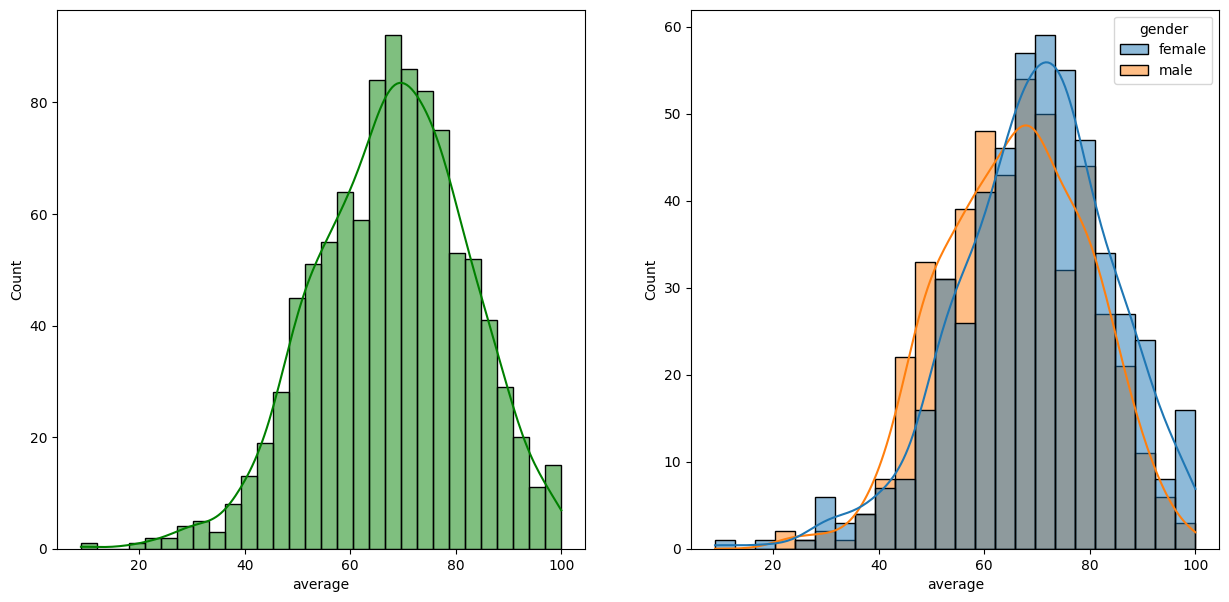

In [15]:
# Visulaizing average score distribution to make some conclusion

fig, axs = plt.subplots(1, 2, figsize=(15, 7)) 
sns.histplot(data=df, x="average", bins=30, kde=True, color="g", ax=axs[0])
sns.histplot(data=df, x="average", kde=True, hue="gender", ax=axs[1])
plt.show()


# Conclusion:

# Female students tend to perform well then male students

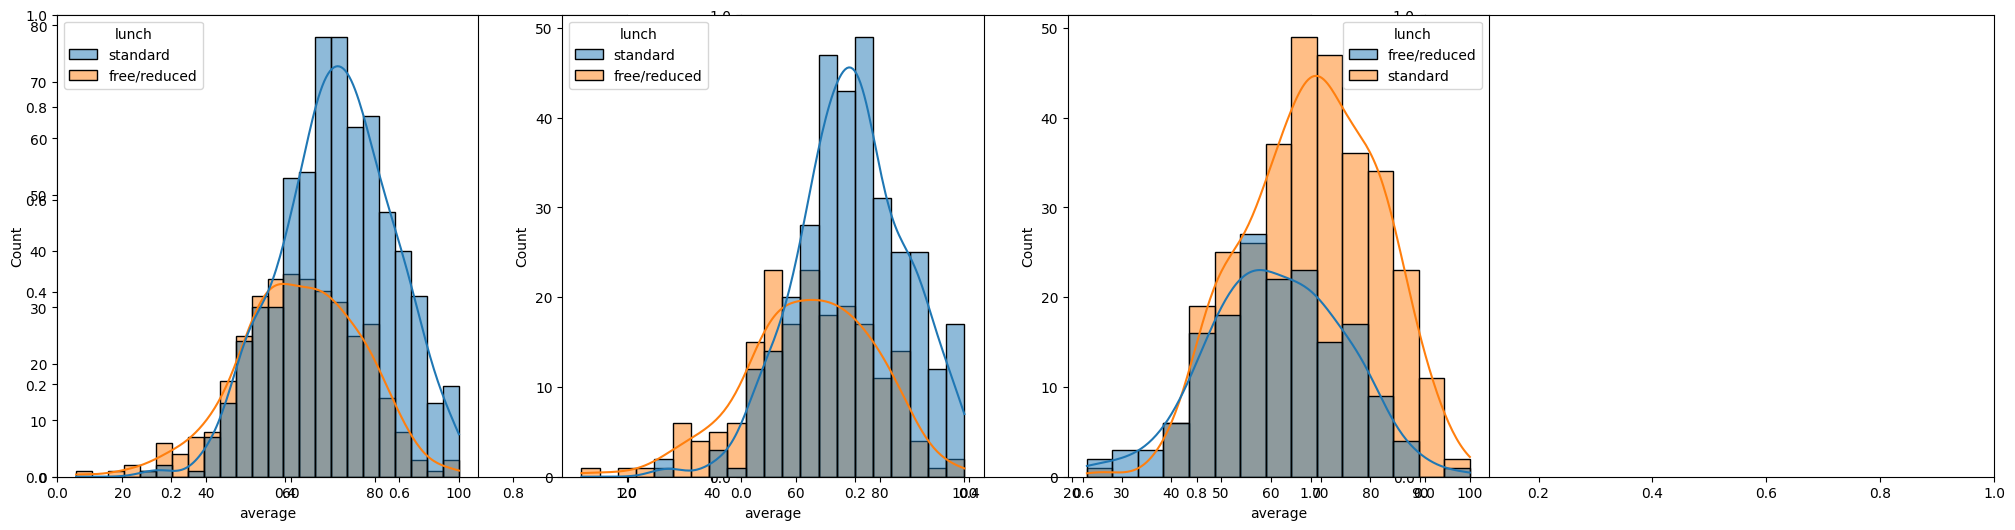

In [16]:
# Visualizing lunch if it helps score good grades or not

plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df, x = "average", kde = True, hue = "lunch")
plt.subplot(142)
sns.histplot(data = df[df.gender == "female"], x = "average", kde = True, hue = "lunch")
plt.subplot(143)
sns.histplot(data = df[df.gender=="male"], x = "average", kde = True, hue = "lunch")
plt.show()


# Conclusion:

# We can conclude by looking at the graph that standard lunch helps students score good wheather male or female

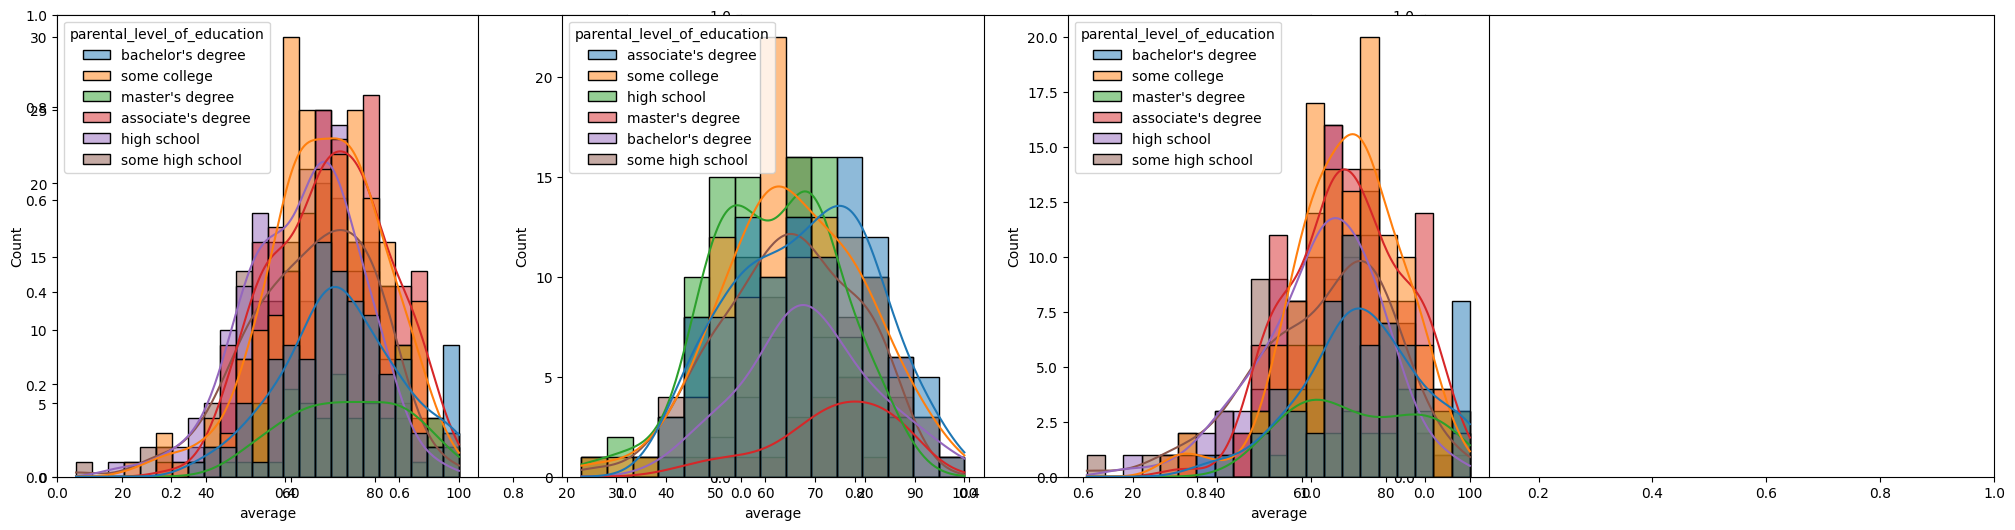

In [17]:
# Visualizing if parental education effects child education


plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
ax = sns.histplot(data = df, x = "average", kde = True, hue = "parental_level_of_education")
plt.subplot(142)
ax = sns.histplot(data = df[df.gender == "male"], x = "average", kde = True, hue = "parental_level_of_education")
plt.subplot(143)
ax = sns.histplot(data = df[df.gender == "female"], x = "average", kde = True, hue = "parental_level_of_education")
plt.show()


# Conclusion:

# By looking at the graph we can conclude that parent education does not matter or depends on their childrens education.

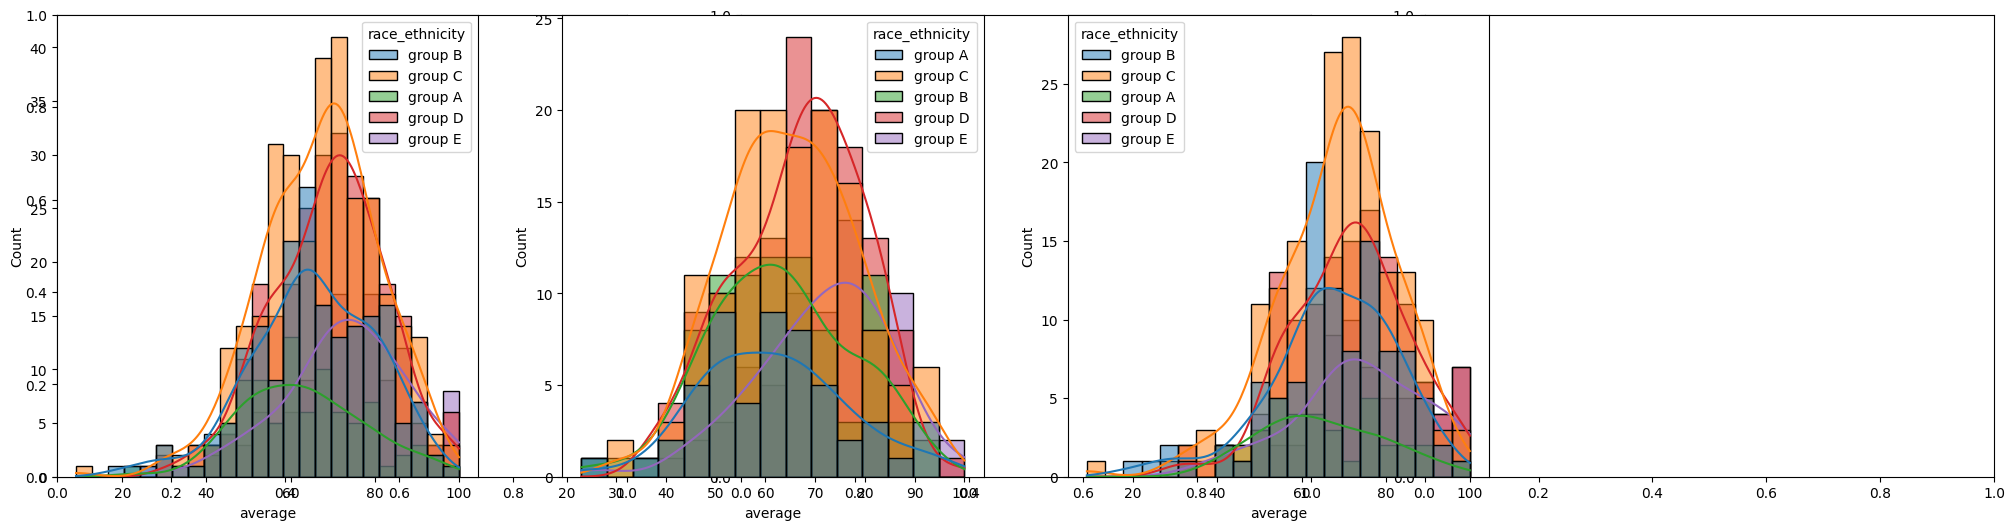

In [18]:
# Checking student grades based on groups


plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
ax = sns.histplot(data = df, x = "average", kde = True, hue = "race_ethnicity")
plt.subplot(142)
ax = sns.histplot(data = df[df.gender == "male"], x = "average", kde = True, hue = "race_ethnicity")
plt.subplot(143)
ax = sns.histplot(data = df[df.gender == "female"], x = "average", kde = True, hue = "race_ethnicity")
plt.show()


#Conclusion

# We can see that students of group A and group B tend to perform poorly in exam
# Student of group A and group B tend to perform poorly in exam and does not matter if male or female

<Axes: title={'center': 'WRITING SCORE'}, ylabel='writing_score'>

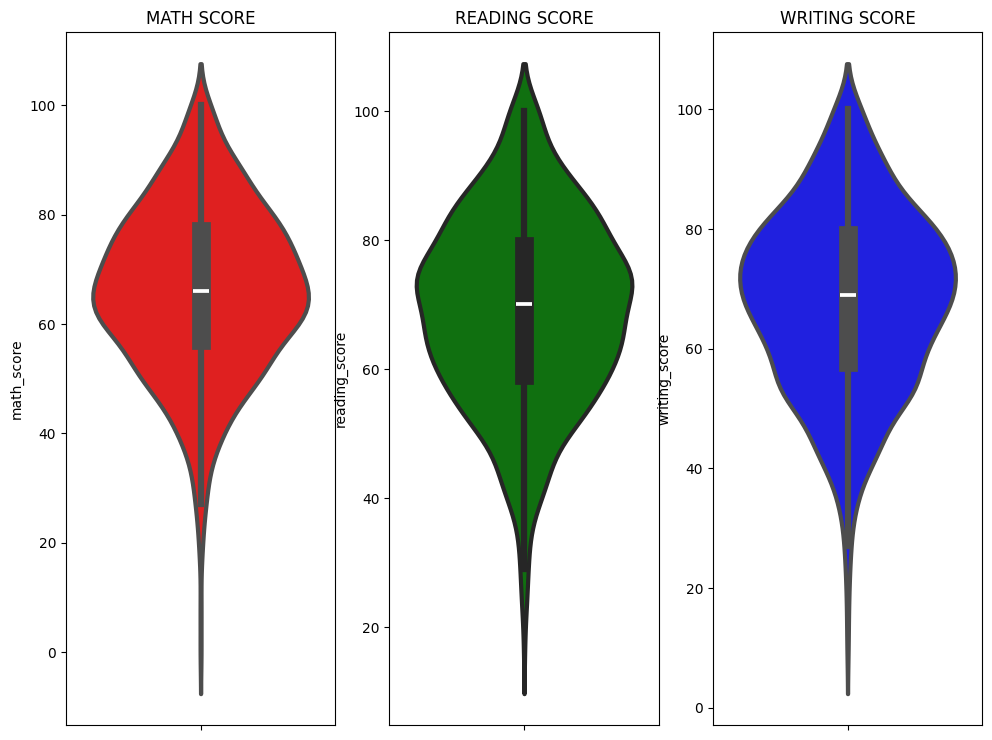

In [19]:
# Maximum score of students based in all three subjects

plt.figure(figsize = (16,9))
plt.subplot(1,4,1)
plt.title("MATH SCORE")
sns.violinplot(y = "math_score", data = df, color = "red", linewidth = 3)
plt.subplot(1,4,2)
plt.title("READING SCORE")
sns.violinplot(y = "reading_score", data = df, color = "green", linewidth = 3)
plt.subplot(1,4,3)
plt.title("WRITING SCORE")
sns.violinplot(y = "writing_score", data = df, color = "blue", linewidth = 3)


# conclusion

# From the above three plots its clear that most of the student scores in between 60 - 80 in Maths wheras in reading 
# and writing most of them score from 50 - 60


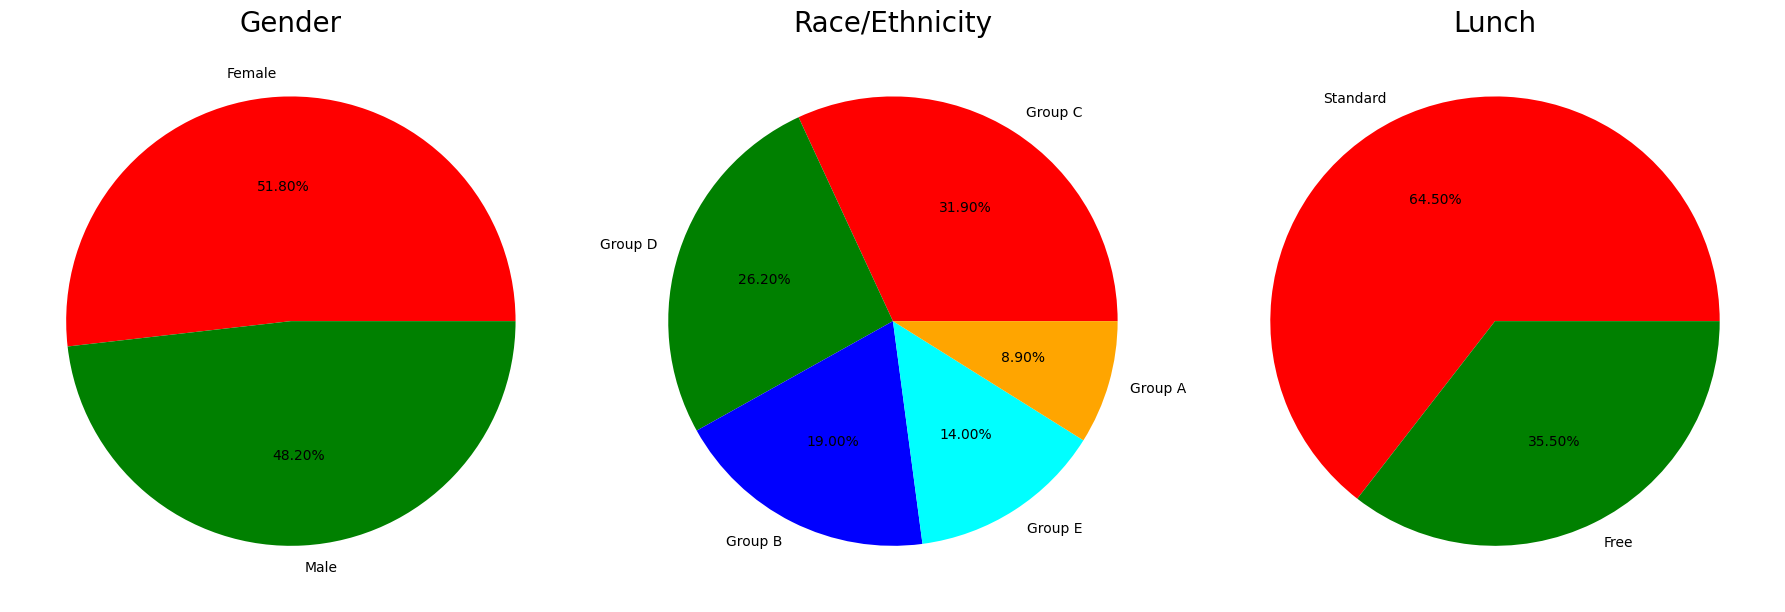

In [20]:


plt.rcParams["figure.figsize"] = (30, 12)

plt.subplot(1, 5, 1)
size = df["gender"].value_counts()
labels = ["Female", "Male"]
colors = ["red", "green"]
plt.pie(size, labels=labels, colors=colors, autopct="%.2f%%")
plt.title("Gender", fontsize=20)
plt.axis("off")


plt.subplot(1, 5, 2)
size = df["race_ethnicity"].value_counts()
labels = ["Group C", "Group D", "Group B", "Group E", "Group A"]
colors = ["red", "green", "blue", "cyan", "orange"]
plt.pie(size, labels=labels, colors=colors, autopct="%.2f%%")
plt.title("Race/Ethnicity", fontsize=20)
plt.axis("off")

plt.subplot(1, 5, 3)
size = df["lunch"].value_counts()
labels = ["Standard", "Free"]
colors = ["red", "green"]
plt.pie(size, labels=labels, colors=colors, autopct="%.2f%%")
plt.title("Lunch", fontsize=20)
plt.axis("off")

plt.tight_layout()
plt.show()



In [21]:
# Gender Column (Univarte visualizing)

# How is gender distributed
# Does gender have any influnce on student perform


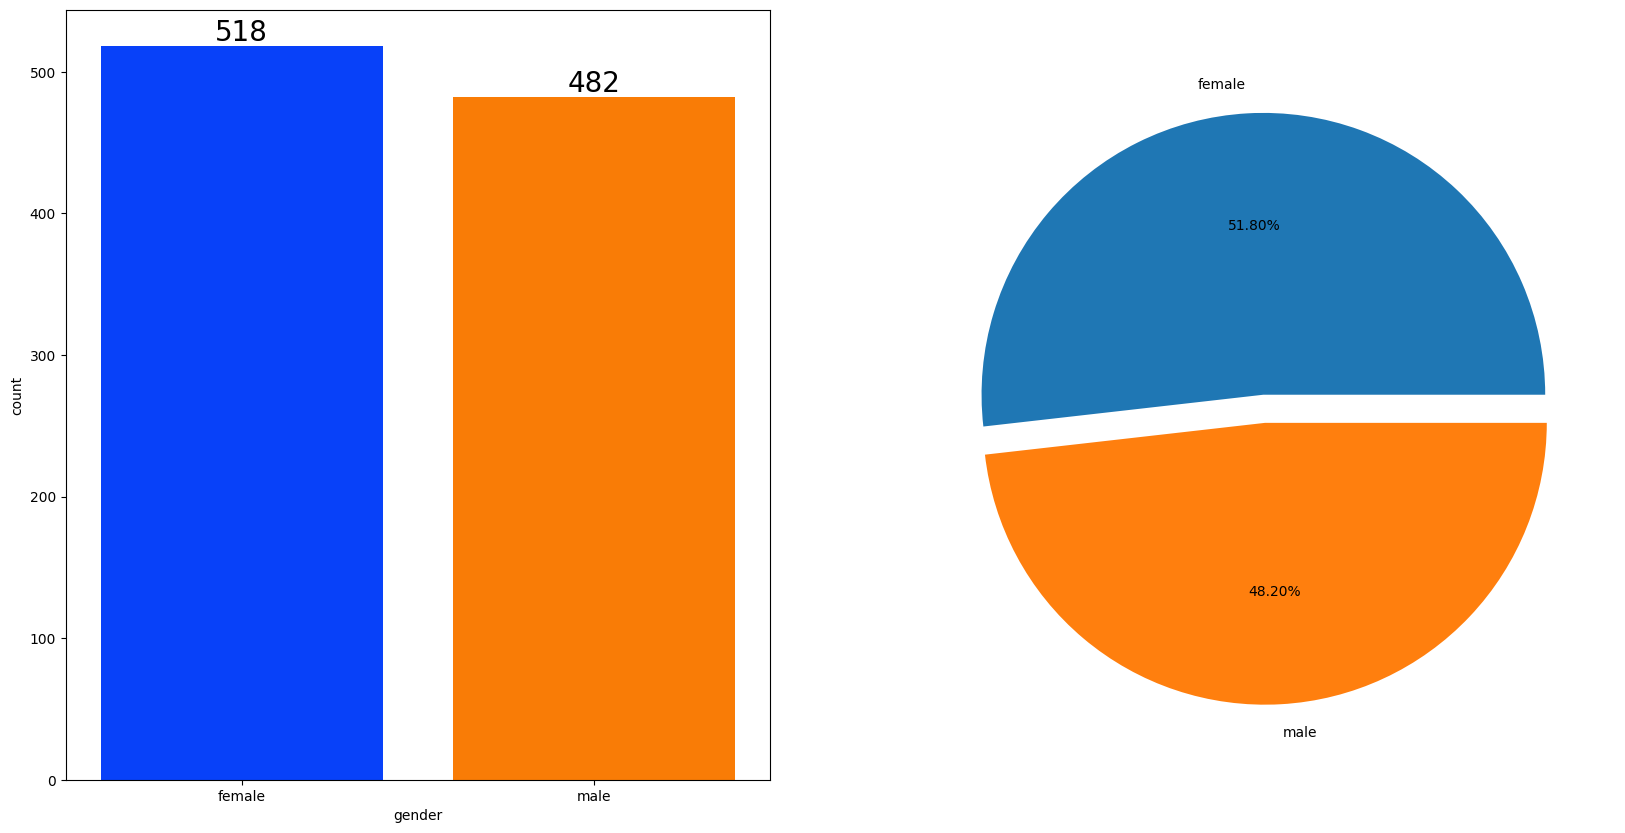

In [22]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x="gender", data=df, palette="bright", ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=20)


gender_counts = df["gender"].value_counts()
ax[1].pie(x=gender_counts,labels=gender_counts.index,  explode=[0, 0.1],autopct="%.2f%%")
plt.show()


# conclusion

# Gender has balanced data with female student are 518(48%) and male students are 48.2(52%)

In [23]:
# Race/Ehnicity column

# How is Group wise distrubution 
# Is race/ethnicity has any impact on student's performance


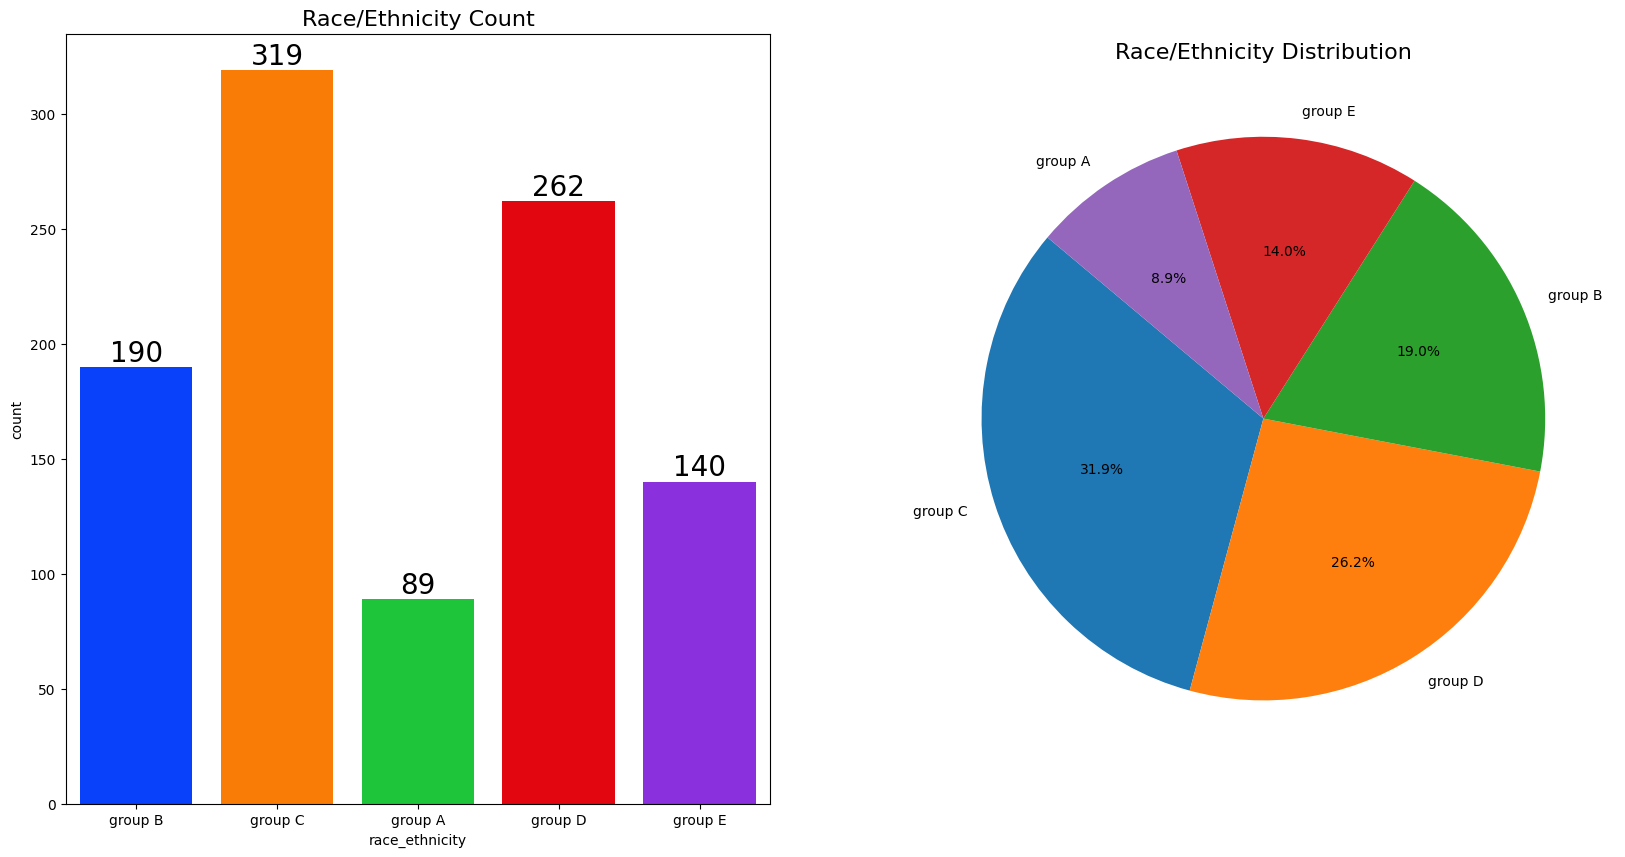

In [24]:
# Race/Ehnicity column( univariate )


f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x=df["race_ethnicity"], palette="bright", ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=20)
ax[0].set_title("Race/Ethnicity Count", fontsize=16)


race_counts = df["race_ethnicity"].value_counts()
ax[1].pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140)
ax[1].set_title("Race/Ethnicity Distribution", fontsize=16)

plt.show()


# MODEL TRAINING

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split



In [27]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# Preparing X and Y Variable

In [28]:
X = df.drop(columns = ["math_score"], axis = 1)

In [29]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,74,218,72.666667
1,female,group C,some college,standard,completed,90,88,247,82.333333
2,female,group B,master's degree,standard,none,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,57,44,148,49.333333
4,male,group C,some college,standard,none,78,75,229,76.333333


In [30]:
print("Categorical in 'gender' variable: ", end = " ")
print(df["gender"].unique())
print("\n")

print("Categorical in 'race_ethnicity' variable: ", end = " ")
print(df["race_ethnicity"].unique())
print("\n")

print("Categorical in 'parental_level_of_education' variable: ", end = " ")
print(df["parental_level_of_education"].unique())
print("\n")

print("Categorical in 'lunch' variable: ", end = " ")
print(df["lunch"].unique())
print("\n")

print("Categorical in 'test_preparation_course' variable: ", end = " ")
print(df["test_preparation_course"].unique())
print("\n")


Categorical in 'gender' variable:  ['female' 'male']


Categorical in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']


Categorical in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Categorical in 'lunch' variable:  ['standard' 'free/reduced']


Categorical in 'test_preparation_course' variable:  ['none' 'completed']




In [31]:
y = df["math_score"]

In [32]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [33]:
# Create columns Transform with 3 type of transformers

num_feature = X.select_dtypes(exclude = "object").columns
cat_feature = X.select_dtypes(exclude = "object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessing = ColumnTransformer(
   [ 
    ("OneHotEncoder", oh_transformer, cat_feature),
    ("StandardScaler", numeric_transformer, num_feature),
   ]   
)

In [34]:
X = preprocessing.fit_transform(X)

In [35]:
X.shape

(1000, 541)

# Applying Train Test Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 44)

print(X_train.shape)
print(X_test.shape)

(800, 541)
(200, 541)


In [37]:
# Creating an evalution function to give all metrics after model training

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)

    return mae, rmse, r2_square

In [41]:
# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K - Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

# Assuming you have a function evaluate_model(y_true, y_pred) returning: MAE, RMSE, R2
for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(name)
    model_list.append(name)

    print("Model performance for Training set")
    print(" - Root Mean Square Error: {:.4f}".format(model_train_rmse))
    print(" - Mean Absolute Error: {:.4f}".format(model_train_mae))       
    print(" - R2 Score: {:.4f}".format(model_train_r2))          

    print("-" * 40)

    print("Model performance for Test set")
    print(" - Root Mean Square Error: {:.4f}".format(model_test_rmse))
    print(" - Mean Absolute Error: {:.4f}".format(model_test_mae))
    print(" - R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("=" * 40)
    print("\n")

Linear Regression
Model performance for Training set
 - Root Mean Square Error: 0.0003
 - Mean Absolute Error: 0.0001
 - R2 Score: 1.0000
----------------------------------------
Model performance for Test set
 - Root Mean Square Error: 0.0816
 - Mean Absolute Error: 0.0215
 - R2 Score: 1.0000


Lasso
Model performance for Training set
 - Root Mean Square Error: 6.1149
 - Mean Absolute Error: 5.0177
 - R2 Score: 0.8362
----------------------------------------
Model performance for Test set
 - Root Mean Square Error: 5.8765
 - Mean Absolute Error: 4.8105
 - R2 Score: 0.8531


Ridge
Model performance for Training set
 - Root Mean Square Error: 0.2492
 - Mean Absolute Error: 0.2004
 - R2 Score: 0.9997
----------------------------------------
Model performance for Test set
 - Root Mean Square Error: 0.3902
 - Mean Absolute Error: 0.3052
 - R2 Score: 0.9994


K - Neighbors Regressor
Model performance for Training set
 - Root Mean Square Error: 4.4612
 - Mean Absolute Error: 3.3772
 - R2 Sco

# Result 

In [43]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model Name", "R2_Score"]).sort_values(by=["R2_Score"], ascending=False)


,Model Name,R2_Score
0,Linear Regression,0.999972
2,Ridge,0.999352
5,Random Forest Regressor,0.977480
4,Decision Tree,0.947846
6,AdaBoost Regressor,0.901498
3,K - Neighbors Regressor,0.867698
1,Lasso,0.853095


# Linear Regression

In [48]:
lr_model = LinearRegression(fit_intercept = True)
lr_model = lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of these model is %.2f" %score)


Accuracy of these model is 100.00


# Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

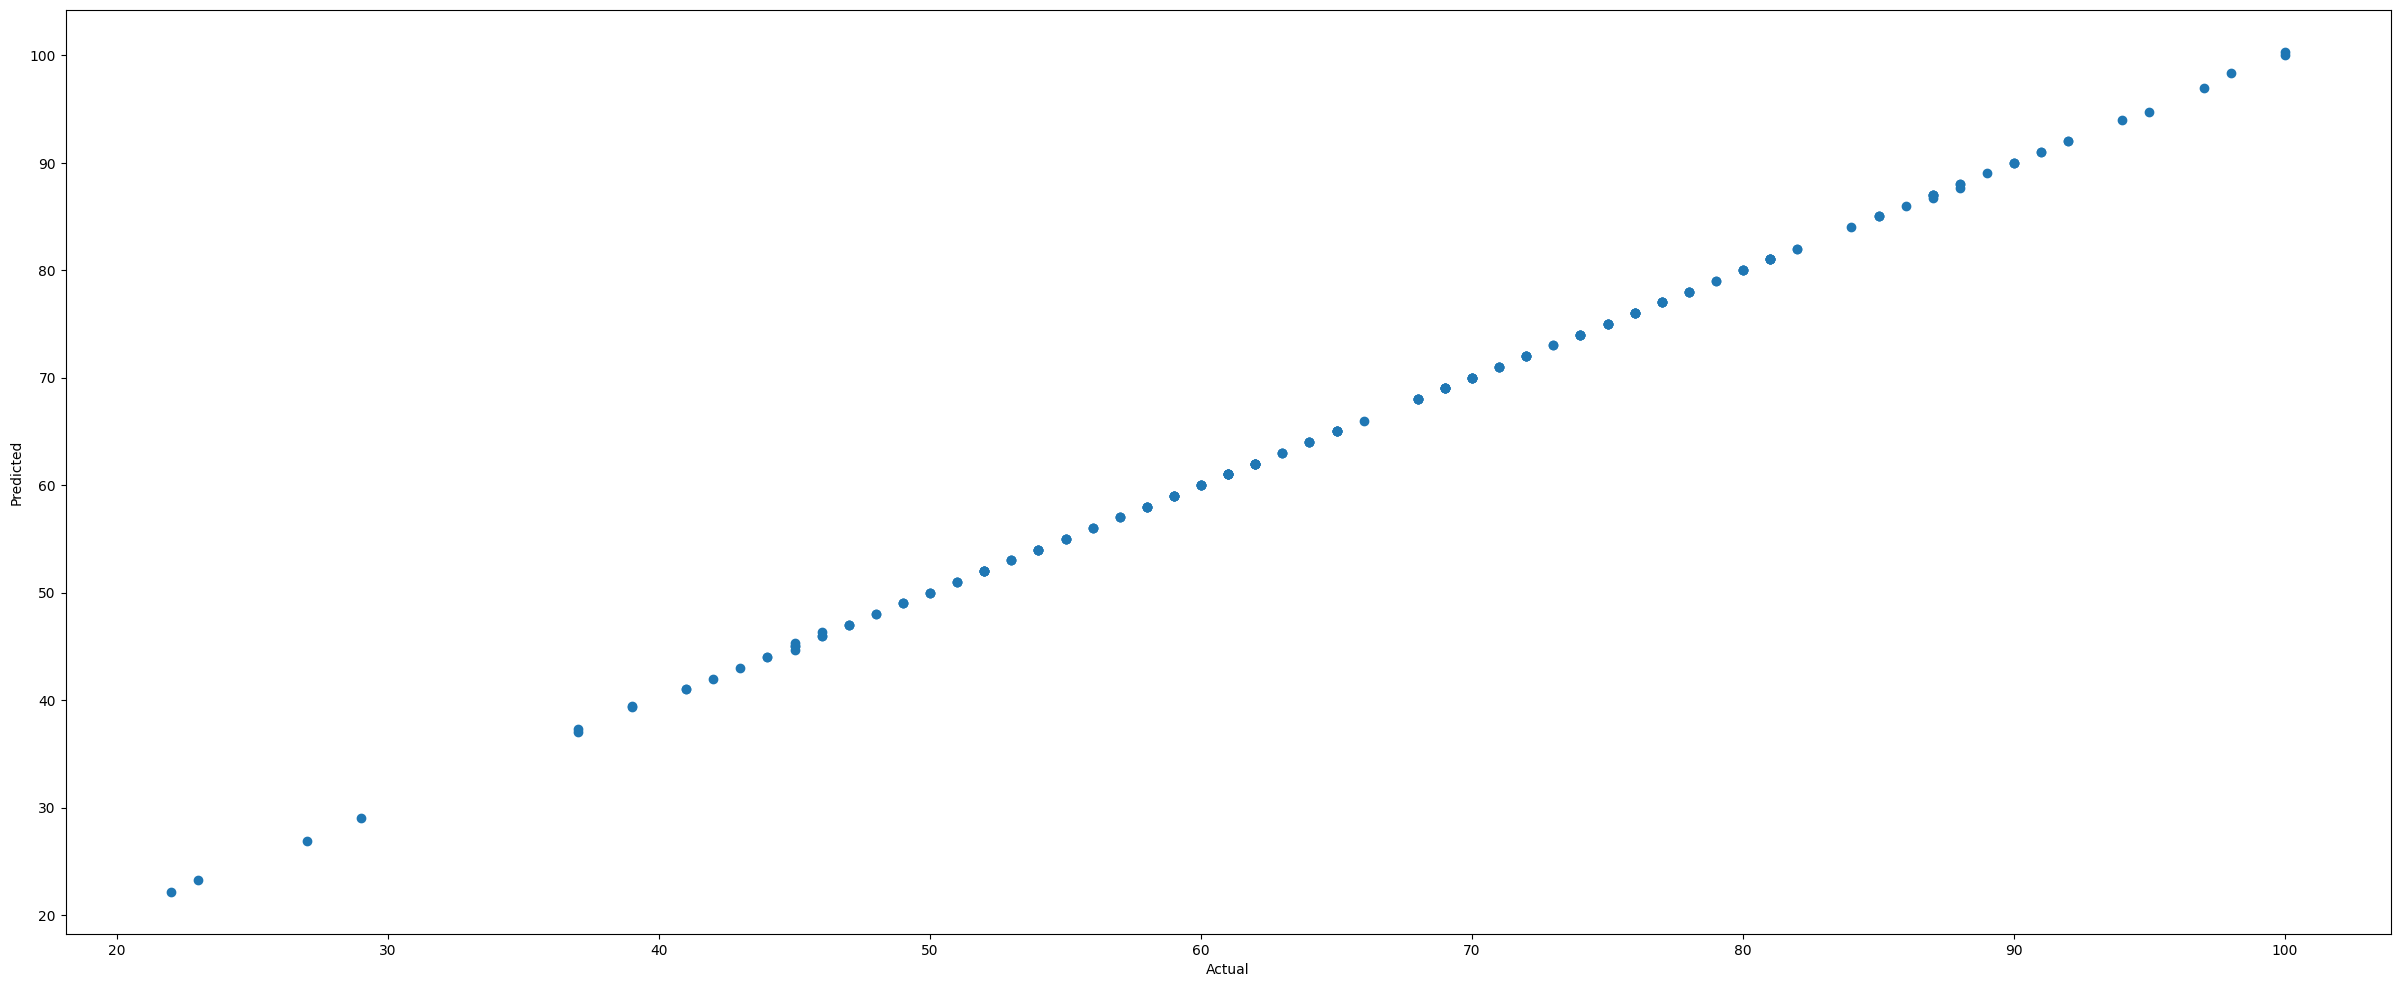

In [54]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math_score'>

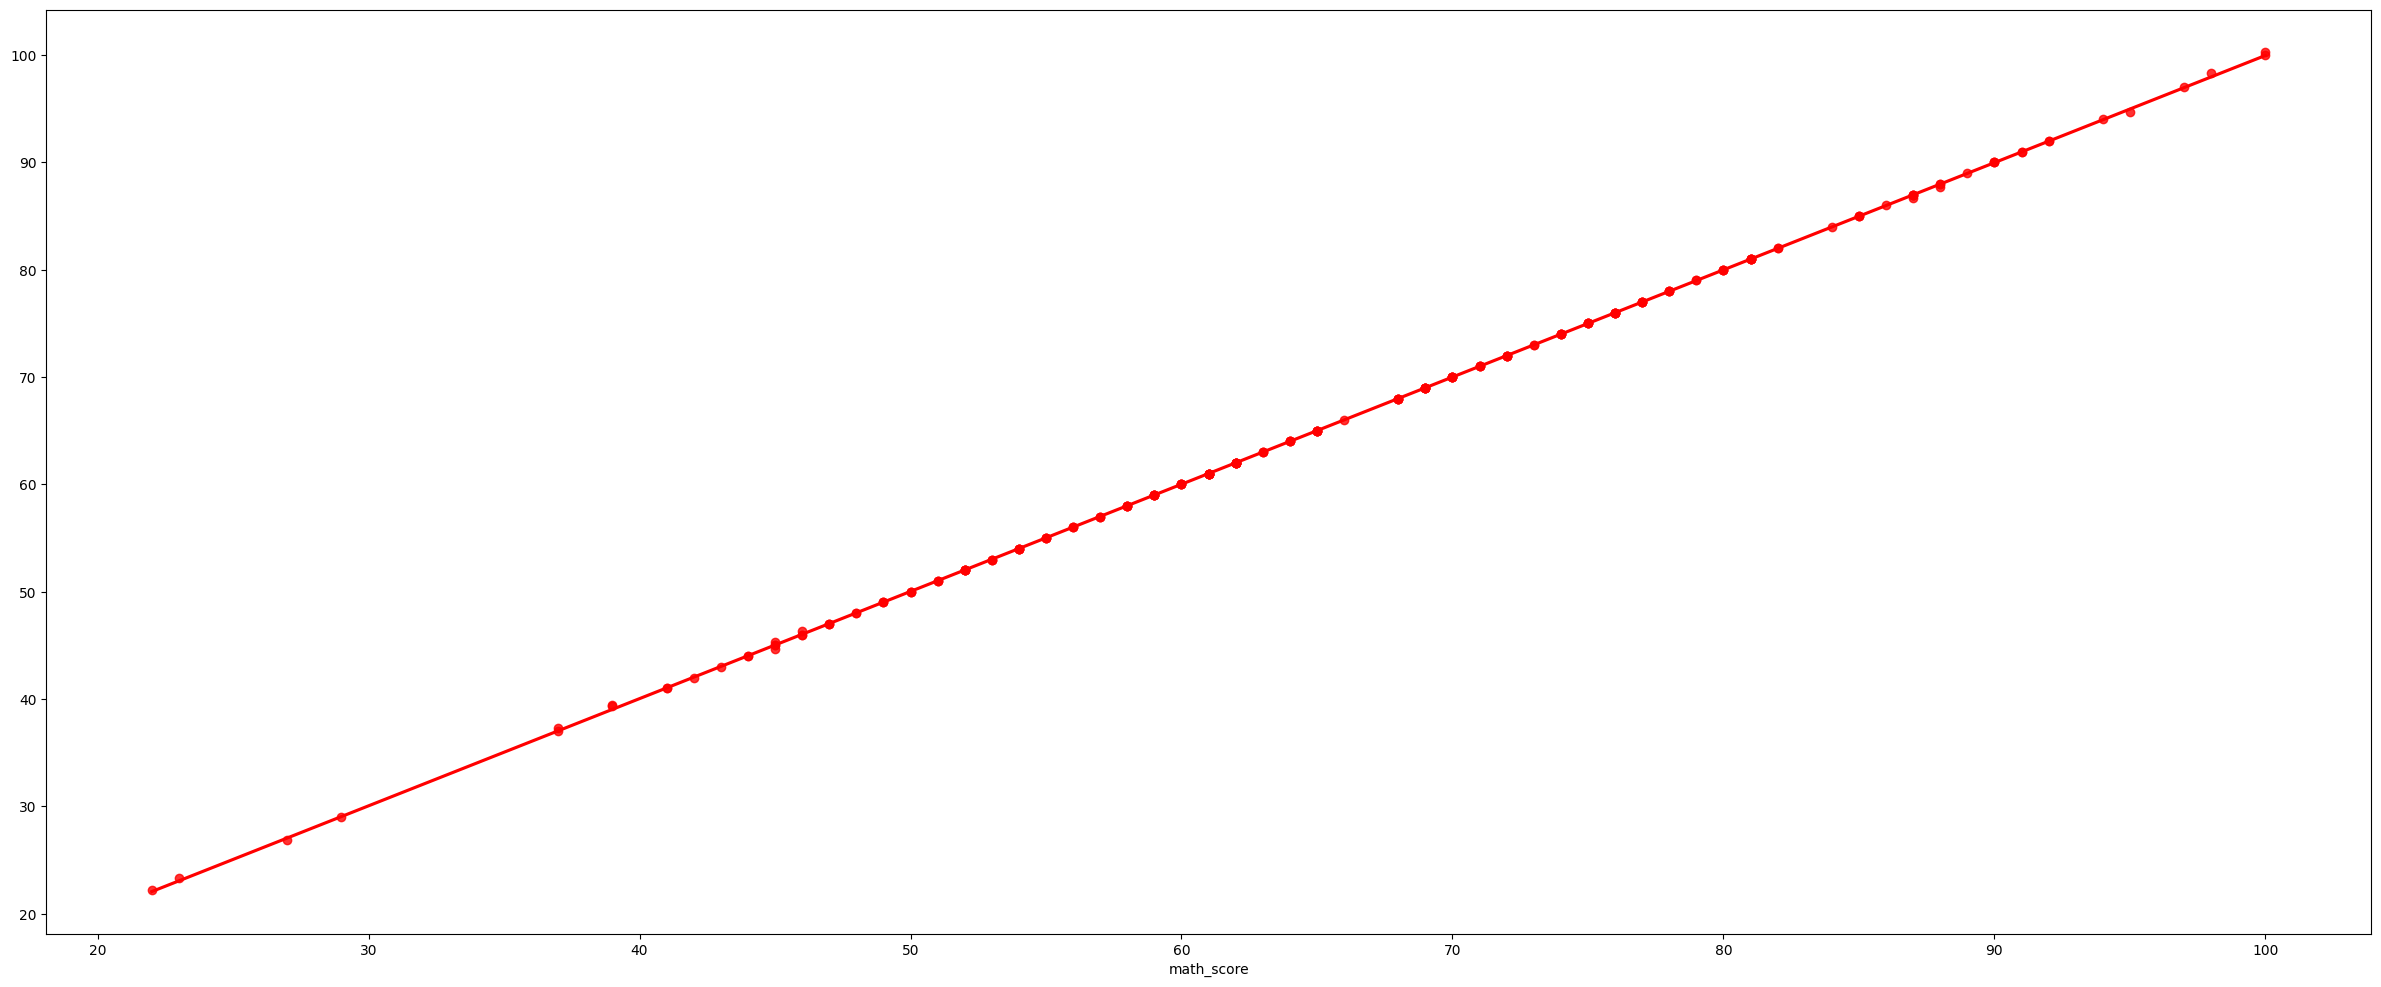

In [55]:
sns.regplot(x=y_test, y=y_pred, ci = None, color = "red")


# Difference between Actual and Predicted Values

In [67]:
pred_df=pd.DataFrame({"Actual Value": y_test,"Predicted Value": y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
118,51,50.999897,0.000103
19,54,53.999976,0.000024
41,58,58.000342,-0.000342
425,62,62.000016,-0.000016
221,87,87.000202,-0.000202
...,...,...,...
714,60,60.000035,-0.000035
744,55,55.000821,-0.000821
671,52,52.000431,-0.000431
286,97,96.999969,0.000031
